Test set size: (1582, 4608)
Number of classes: 8
--- Calibrated Ridge ---
Accuracy: 78.70%
Confusion Matrix:
 [[ 71   2   2   1   4   2   7   0]
 [  1 162  11   3  20   1   3   2]
 [  1  12  65   0  13   0   0   0]
 [  1   8   1  99   2   0   2   1]
 [  1   6   3   1 631  32   9   7]
 [  0   0   0   0  74  47   4   0]
 [  2   6   0   1  32   6 109   2]
 [  1   2   1   0  42   3   2  61]]
ROC AUC (OVR): 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85        89
           1       0.82      0.80      0.81       203
           2       0.78      0.71      0.75        91
           3       0.94      0.87      0.90       114
           4       0.77      0.91      0.84       690
           5       0.52      0.38      0.44       125
           6       0.80      0.69      0.74       158
           7       0.84      0.54      0.66       112

    accuracy                           0.79      1582
   macro avg       0.80

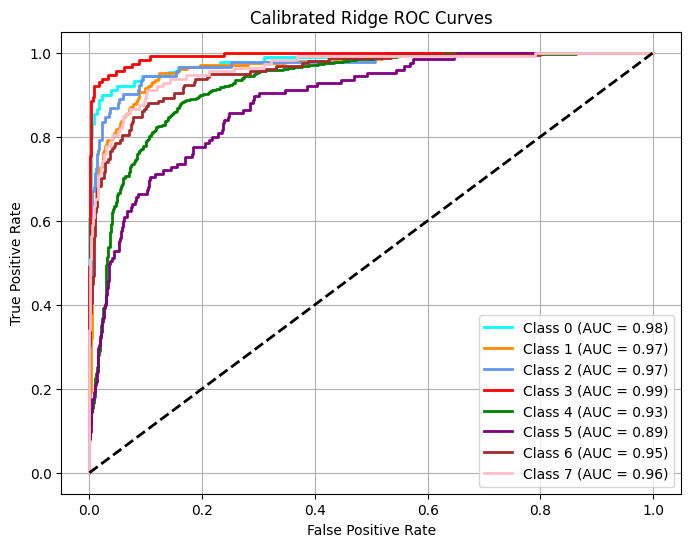

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder, label_binarize

# -----------------------------
# 1. Load Merged Features and Labels
# -----------------------------
features_path = "/kaggle/input/merged-feats/merged_fused_selected_features.npy"
labels_path   = "/kaggle/input/merged-feats/merged_labels.npy"

X = np.load(features_path)   # shape: (N, feature_dim)
y = np.load(labels_path)     # shape: (N,)

# Split to get the 20% test set
_, X_test, _, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Encode labels (if they are strings)
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
num_classes = len(np.unique(y_test_enc))
print("Test set size:", X_test.shape)
print("Number of classes:", num_classes)

# Binarize labels for ROC computation
y_test_bin = label_binarize(y_test_enc, classes=range(num_classes))

# -----------------------------
# 2. Define a Function for Model Evaluation
# -----------------------------
def evaluate_model(model, model_name):
    """
    Evaluate a classifier on the test set and plot ROC curves.
    Assumes the model has a predict_proba() method.
    """
    # Get predicted probabilities and class predictions
    pred_proba = model.predict_proba(X_test)
    pred = np.argmax(pred_proba, axis=1)
    
    # Calculate metrics
    acc = accuracy_score(y_test_enc, pred)
    cm = confusion_matrix(y_test_enc, pred)
    auc_score = roc_auc_score(y_test_bin, pred_proba, multi_class='ovr')
    report = classification_report(y_test_enc, pred)
    
    print(f"--- {model_name} ---")
    print("Accuracy: {:.2f}%".format(acc * 100))
    print("Confusion Matrix:\n", cm)
    print("ROC AUC (OVR): {:.2f}".format(auc_score))
    print("Classification Report:\n", report)
    
    # Plot ROC curves for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8,6))
    for i, color in zip(range(num_classes), cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green',
                                                    'purple', 'brown', 'pink', 'gray', 'olive'])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# -----------------------------
# 3. Load and Evaluate Each Model Individually
# -----------------------------

# Calibrated Ridge Model
calibratedridge_path = "/kaggle/input/basemodels/CalibratedRidge.pkl"
with open(calibratedridge_path, "rb") as f:
    calibratedridge_model = pickle.load(f)
evaluate_model(calibratedridge_model, "Calibrated Ridge")


Test set size: (1582, 4608)
Number of classes: 8
--- ExtraTrees ---
Accuracy: 63.84%
Confusion Matrix:
 [[ 43   8   0   8  28   0   2   0]
 [  0 144   3   2  54   0   0   0]
 [  1  45  15   1  28   0   0   1]
 [  2  16   0  54  41   0   1   0]
 [  0   4   0   0 663  22   1   0]
 [  0   0   0   0 104  19   2   0]
 [  3   5   0   3  93   3  51   0]
 [  2   9   0   1  78   0   1  21]]
ROC AUC (OVR): 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.48      0.61        89
           1       0.62      0.71      0.66       203
           2       0.83      0.16      0.28        91
           3       0.78      0.47      0.59       114
           4       0.61      0.96      0.75       690
           5       0.43      0.15      0.22       125
           6       0.88      0.32      0.47       158
           7       0.95      0.19      0.31       112

    accuracy                           0.64      1582
   macro avg       0.74      

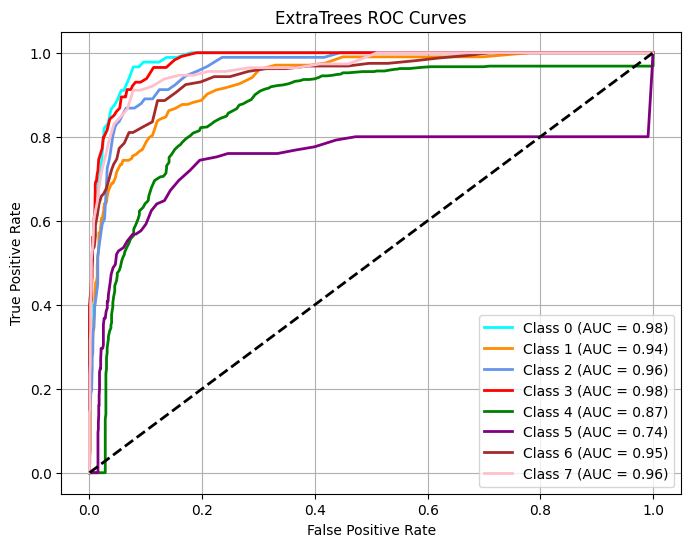

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder, label_binarize

# -----------------------------
# 1. Load Merged Features and Labels
# -----------------------------
features_path = "/kaggle/input/merged-feats/merged_fused_selected_features.npy"
labels_path   = "/kaggle/input/merged-feats/merged_labels.npy"

X = np.load(features_path)   # shape: (N, feature_dim)
y = np.load(labels_path)     # shape: (N,)

# Split to get the 20% test set
_, X_test, _, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Encode labels (if they are strings)
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
num_classes = len(np.unique(y_test_enc))
print("Test set size:", X_test.shape)
print("Number of classes:", num_classes)

# Binarize labels for ROC computation
y_test_bin = label_binarize(y_test_enc, classes=range(num_classes))

# -----------------------------
# 2. Define a Function for Model Evaluation
# -----------------------------
def evaluate_model(model, model_name):
    """
    Evaluate a classifier on the test set and plot ROC curves.
    Assumes the model has a predict_proba() method.
    """
    # Get predicted probabilities and class predictions
    pred_proba = model.predict_proba(X_test)
    pred = np.argmax(pred_proba, axis=1)
    
    # Calculate metrics
    acc = accuracy_score(y_test_enc, pred)
    cm = confusion_matrix(y_test_enc, pred)
    auc_score = roc_auc_score(y_test_bin, pred_proba, multi_class='ovr')
    report = classification_report(y_test_enc, pred)
    
    print(f"--- {model_name} ---")
    print("Accuracy: {:.2f}%".format(acc * 100))
    print("Confusion Matrix:\n", cm)
    print("ROC AUC (OVR): {:.2f}".format(auc_score))
    print("Classification Report:\n", report)
    
    # Plot ROC curves for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8,6))
    for i, color in zip(range(num_classes), cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green',
                                                    'purple', 'brown', 'pink', 'gray', 'olive'])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# -----------------------------
# 3. Load and Evaluate Each Model Individually
# -----------------------------

# Calibrated Ridge Model
calibratedridge_path = "/kaggle/input/basemodels/ExtraTrees.pkl"
with open(calibratedridge_path, "rb") as f:
    calibratedridge_model = pickle.load(f)
evaluate_model(calibratedridge_model, "ExtraTrees")


Test set size: (1582, 4608)
Number of classes: 8
--- LogisticRegression ---
Accuracy: 81.10%
Confusion Matrix:
 [[ 78   4   1   1   0   0   5   0]
 [  0 171  12   3  10   0   2   5]
 [  0  14  68   0   6   0   0   3]
 [  1   7   1  98   3   0   3   1]
 [  4   3   3   2 603  43  20  12]
 [  0   0   0   0  51  67   5   2]
 [  5   7   0   1  17   7 118   3]
 [  2   3   1   2  21   2   1  80]]
ROC AUC (OVR): 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        89
           1       0.82      0.84      0.83       203
           2       0.79      0.75      0.77        91
           3       0.92      0.86      0.89       114
           4       0.85      0.87      0.86       690
           5       0.56      0.54      0.55       125
           6       0.77      0.75      0.76       158
           7       0.75      0.71      0.73       112

    accuracy                           0.81      1582
   macro avg       0.

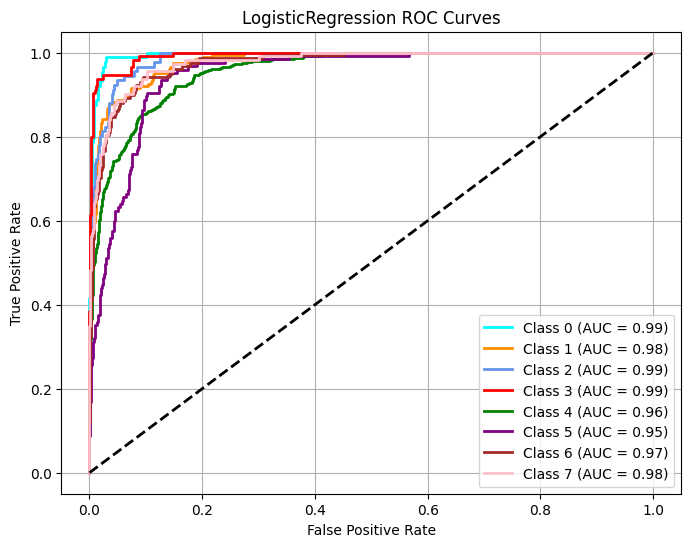

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder, label_binarize

# -----------------------------
# 1. Load Merged Features and Labels
# -----------------------------
features_path = "/kaggle/input/merged-feats/merged_fused_selected_features.npy"
labels_path   = "/kaggle/input/merged-feats/merged_labels.npy"

X = np.load(features_path)   # shape: (N, feature_dim)
y = np.load(labels_path)     # shape: (N,)

# Split to get the 20% test set
_, X_test, _, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Encode labels (if they are strings)
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
num_classes = len(np.unique(y_test_enc))
print("Test set size:", X_test.shape)
print("Number of classes:", num_classes)

# Binarize labels for ROC computation
y_test_bin = label_binarize(y_test_enc, classes=range(num_classes))

# -----------------------------
# 2. Define a Function for Model Evaluation
# -----------------------------
def evaluate_model(model, model_name):
    """
    Evaluate a classifier on the test set and plot ROC curves.
    Assumes the model has a predict_proba() method.
    """
    # Get predicted probabilities and class predictions
    pred_proba = model.predict_proba(X_test)
    pred = np.argmax(pred_proba, axis=1)
    
    # Calculate metrics
    acc = accuracy_score(y_test_enc, pred)
    cm = confusion_matrix(y_test_enc, pred)
    auc_score = roc_auc_score(y_test_bin, pred_proba, multi_class='ovr')
    report = classification_report(y_test_enc, pred)
    
    print(f"--- {model_name} ---")
    print("Accuracy: {:.2f}%".format(acc * 100))
    print("Confusion Matrix:\n", cm)
    print("ROC AUC (OVR): {:.2f}".format(auc_score))
    print("Classification Report:\n", report)
    
    # Plot ROC curves for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8,6))
    for i, color in zip(range(num_classes), cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green',
                                                    'purple', 'brown', 'pink', 'gray', 'olive'])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# -----------------------------
# 3. Load and Evaluate Each Model Individually
# -----------------------------

# Calibrated Ridge Model
calibratedridge_path = "/kaggle/input/basemodels/LogisticRegression.pkl"
with open(calibratedridge_path, "rb") as f:
    calibratedridge_model = pickle.load(f)
evaluate_model(calibratedridge_model, "LogisticRegression")


Test set size: (1582, 4608)
Number of classes: 8
--- SVC ---
Accuracy: 77.18%
Confusion Matrix:
 [[ 67   1   3   5   2   1  10   0]
 [  2 143  15   6  27   2   8   0]
 [  3  26  47   3   7   1   0   4]
 [  0  10   0  99   1   0   2   2]
 [  4   0   3   1 628  23  16  15]
 [  1   0   0   0  58  57   9   0]
 [  4   4   2   3  26   8 107   4]
 [  0   1   0   2  33   0   3  73]]
ROC AUC (OVR): 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        89
           1       0.77      0.70      0.74       203
           2       0.67      0.52      0.58        91
           3       0.83      0.87      0.85       114
           4       0.80      0.91      0.85       690
           5       0.62      0.46      0.53       125
           6       0.69      0.68      0.68       158
           7       0.74      0.65      0.70       112

    accuracy                           0.77      1582
   macro avg       0.75      0.69   

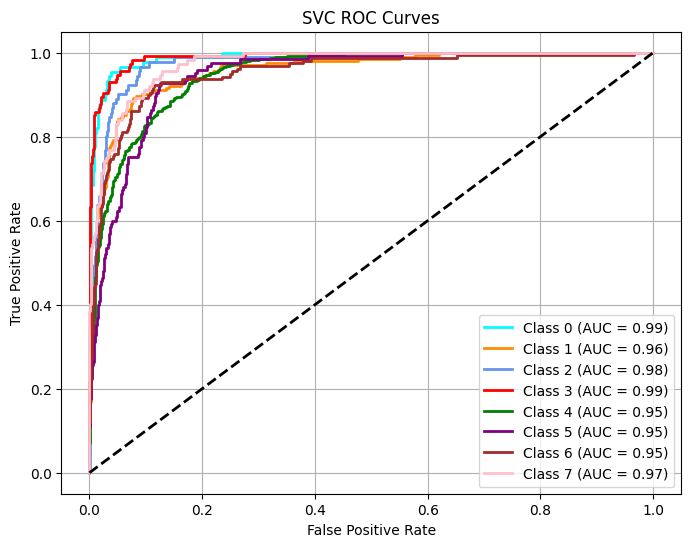

In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder, label_binarize

# -----------------------------
# 1. Load Merged Features and Labels
# -----------------------------
features_path = "/kaggle/input/merged-feats/merged_fused_selected_features.npy"
labels_path   = "/kaggle/input/merged-feats/merged_labels.npy"

X = np.load(features_path)   # shape: (N, feature_dim)
y = np.load(labels_path)     # shape: (N,)

# Split to get the 20% test set
_, X_test, _, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Encode labels (if they are strings)
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
num_classes = len(np.unique(y_test_enc))
print("Test set size:", X_test.shape)
print("Number of classes:", num_classes)

# Binarize labels for ROC computation
y_test_bin = label_binarize(y_test_enc, classes=range(num_classes))

# -----------------------------
# 2. Define a Function for Model Evaluation
# -----------------------------
def evaluate_model(model, model_name):
    """
    Evaluate a classifier on the test set and plot ROC curves.
    Assumes the model has a predict_proba() method.
    """
    # Get predicted probabilities and class predictions
    pred_proba = model.predict_proba(X_test)
    pred = np.argmax(pred_proba, axis=1)
    
    # Calculate metrics
    acc = accuracy_score(y_test_enc, pred)
    cm = confusion_matrix(y_test_enc, pred)
    auc_score = roc_auc_score(y_test_bin, pred_proba, multi_class='ovr')
    report = classification_report(y_test_enc, pred)
    
    print(f"--- {model_name} ---")
    print("Accuracy: {:.2f}%".format(acc * 100))
    print("Confusion Matrix:\n", cm)
    print("ROC AUC (OVR): {:.2f}".format(auc_score))
    print("Classification Report:\n", report)
    
    # Plot ROC curves for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8,6))
    for i, color in zip(range(num_classes), cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green',
                                                    'purple', 'brown', 'pink', 'gray', 'olive'])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# -----------------------------
# 3. Load and Evaluate Each Model Individually
# -----------------------------

# Calibrated Ridge Model
calibratedridge_path = "/kaggle/input/basemodels/SVC.pkl"
with open(calibratedridge_path, "rb") as f:
    calibratedridge_model = pickle.load(f)
evaluate_model(calibratedridge_model, "SVC")


Test set size: (1582, 4608)
Number of classes: 8
--- XGBoost ---
Accuracy: 78.76%
Confusion Matrix:
 [[ 68   2   2   6   4   0   7   0]
 [  2 151  10   5  28   1   6   0]
 [  1  20  59   0  11   0   0   0]
 [  1  11   0  95   5   0   1   1]
 [  2   0   3   0 652  27   5   1]
 [  0   1   0   0  66  51   6   1]
 [  1   4   0   4  37   8 104   0]
 [  1   3   0   1  37   0   4  66]]
ROC AUC (OVR): 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        89
           1       0.79      0.74      0.76       203
           2       0.80      0.65      0.72        91
           3       0.86      0.83      0.84       114
           4       0.78      0.94      0.85       690
           5       0.59      0.41      0.48       125
           6       0.78      0.66      0.71       158
           7       0.96      0.59      0.73       112

    accuracy                           0.79      1582
   macro avg       0.80      0.7

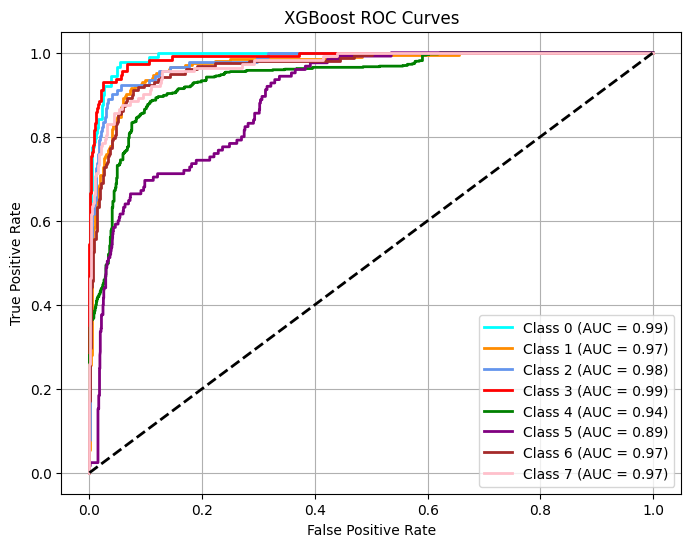

In [7]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder, label_binarize

# -----------------------------
# 1. Load Merged Features and Labels
# -----------------------------
features_path = "/kaggle/input/merged-feats/merged_fused_selected_features.npy"
labels_path   = "/kaggle/input/merged-feats/merged_labels.npy"

X = np.load(features_path)   # shape: (N, feature_dim)
y = np.load(labels_path)     # shape: (N,)

# Split to get the 20% test set
_, X_test, _, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Encode labels (if they are strings)
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
num_classes = len(np.unique(y_test_enc))
print("Test set size:", X_test.shape)
print("Number of classes:", num_classes)

# Binarize labels for ROC computation
y_test_bin = label_binarize(y_test_enc, classes=range(num_classes))

# -----------------------------
# 2. Define a Function for Model Evaluation
# -----------------------------
def evaluate_model(model, model_name):
    """
    Evaluate a classifier on the test set and plot ROC curves.
    Assumes the model has a predict_proba() method.
    """
    # Get predicted probabilities and class predictions
    pred_proba = model.predict_proba(X_test)
    pred = np.argmax(pred_proba, axis=1)
    
    # Calculate metrics
    acc = accuracy_score(y_test_enc, pred)
    cm = confusion_matrix(y_test_enc, pred)
    auc_score = roc_auc_score(y_test_bin, pred_proba, multi_class='ovr')
    report = classification_report(y_test_enc, pred)
    
    print(f"--- {model_name} ---")
    print("Accuracy: {:.2f}%".format(acc * 100))
    print("Confusion Matrix:\n", cm)
    print("ROC AUC (OVR): {:.2f}".format(auc_score))
    print("Classification Report:\n", report)
    
    # Plot ROC curves for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8,6))
    for i, color in zip(range(num_classes), cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green',
                                                    'purple', 'brown', 'pink', 'gray', 'olive'])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# -----------------------------
# 3. Load and Evaluate Each Model Individually
# -----------------------------

# Calibrated Ridge Model
calibratedridge_path = "/kaggle/input/basemodels/XGBoost.pkl"
with open(calibratedridge_path, "rb") as f:
    calibratedridge_model = pickle.load(f)
evaluate_model(calibratedridge_model, "XGBoost")
